$Pr\'actico de Astrometr\''a$

In [83]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as sp


In [84]:
t=np.loadtxt('MyTable_agus_mrm.csv',skiprows=1,delimiter=',')
ue=[]
ge=[]
re=[]
gue=[]
gre=[]

us=[]
gs=[]
rs=[]
gus=[]
grs=[]

In [85]:
for i in range(len(t)):
    if t[i,7]>=.8:
        ue.append(t[i,4])
        ge.append(t[i,5])
        re.append(t[i,6])
    if t[i,8]>=.8:
        us.append(t[i,4])
        gs.append(t[i,5])
        rs.append(t[i,6])

In [86]:
#ESTOY HACIENDO G-U

for i in range(len(ue)):
    gue.append(ge[i]-ue[i])
    gre.append(ge[i]-re[i])
for i in range(len(us)):    
    gus.append(gs[i]-us[i])
    grs.append(gs[i]-rs[i])

In [87]:
bins=np.linspace(-5,1,51)
#bins=np.linspace(-5,1,np.sqrt(len(gue)))



<function matplotlib.pyplot.show>

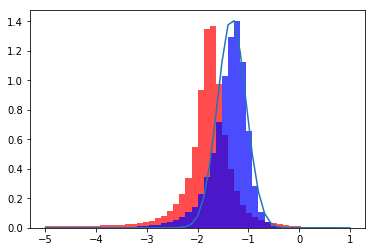

In [88]:
#################G-U
plt.hist(gue,bins,density='True',stacked='True',color='red',alpha=.7)
plt.hist(gus,bins,density='True',stacked='True',color='blue',alpha=.7)

#----------------------->   MODELO PROPUESTO           ¿como estimar la desv ? lo hice a ojo
plt.plot(bins,sp.norm.pdf(bins,np.median(gus),.28))   
plt.show

In [89]:
n=sp.norm(np.median(gue),.28)
randgue=np.random.choice(gue,1000)

randgus=np.random.choice(gus,1000)

In [90]:
kst=sp.kstest(randgue,n.cdf)
print kst

KstestResult(statistic=0.09591926543623701, pvalue=1.8496454368133186e-08)


0.09491926543623701

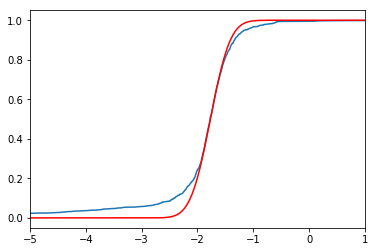

In [91]:
vgue=np.sort(randgue)
vgue=vgue[vgue<100]
v2gue=np.arange(len(vgue))/float(len(vgue))

vgus=np.sort(randgus)
vgus=vgus[vgus<100]
#ult=len(gue)
#print ult

#v[171473]=0

plt.plot(vgue,v2gue)
plt.xlim(-5,1)

anorm=sp.norm.cdf(vgue,np.median(gue),.28)
plt.plot(vgue,anorm,color='red')

dist=abs(v2gue-anorm)
np.max(dist)



In [92]:
interp=np.interp(vgue,v2gue)


np.max(v2gue-interp)


TypeError: interp() takes at least 3 arguments (2 given)

In [ ]:
#DISTRIBUCION ACUMULADA
anorm=sp.norm.cdf(bins,np.median(gue))
plt.plot(bins,anorm)

plt.show

In [ ]:
pvalue=[]
for i in range(100):
    ks=sp.kstest(np.random.choice(gus,100),n.cdf)
    pvalue.append(ks[1])

In [ ]:
plt.hist(pvalue,10)
plt.show

In [ ]:
##################G-R
bins=np.linspace(-1,3,41)
plt.hist(gre,bins,density='True',stacked='True',color='red',alpha=.7)
plt.hist(grs,bins,density='True',stacked='True',color='blue',alpha=.7)
plt.show

In [ ]:
sp.kstest(gue,'norm')

In [ ]:
#DISTRIBUCION POR TIPO MORFOLOGICO


In [ ]:
#MAGNITUD APARENTE EN BANDA R EN FUNCION DE BANDA G
g=[]
r=[]
grand=[]
rrand=[]

n=100

In [ ]:
import random

In [ ]:
for i in range(len(t)):
    r.append(t[i,5])
    g.append(t[i,6])

In [ ]:
for i in range(n):
    rand=random.randrange(len(r))
    rrand.append(r[rand])
    grand.append(g[rand])

In [ ]:
#AJUSTE CUADRADOS MINIMOS
Sumxi=np.sum(rrand)
Sumyi=np.sum(grand)

In [ ]:
xiyi=[]
xi2=[]
for i in range(n):
    xiyi.append(rrand[i]*grand[i])
    xi2.append(rrand[i]**2.)
    
Sumxiyi=np.sum(xiyi)
Sumxi2=np.sum(xi2)

In [ ]:
Sxy=Sumxiyi-(Sumxi*Sumyi)/n
Sxx=Sumxi2-((Sumxi)**2.)/n

In [ ]:
a=Sxy/Sxx
b=(Sumyi-a*Sumxi)/n
b


In [ ]:
xp=[]
yp=[]
for i in np.linspace(np.min(rrand),np.max(rrand),2):
    xp.append(i)
    yp.append(a*i+b)

In [ ]:
plt.plot(rrand,grand,linestyle='none',marker='.',color='black')
plt.plot(xp,yp,color='red',marker='.')
plt.show

In [93]:
#CALCULO DE LA M abs
H=75.
c=300000.
M=[]
M17=[]
Z17=[]

Mg=[]
Zg=[]

In [94]:
for i in range(len(t)):
    m=t[i,6]
    z=t[i,0]
    M.append(m-25.-5.*np.log10(c*z/H))
    if t[i,6]<17.5:
        M17.append(M[i])
        Z17.append(t[i,0])
        
        
    

/home/agustin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/agustin/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [95]:
for i in range(1000):
    rd=random.randrange(len(M17))
    Mg.append(M17[rd])
    Zg.append(Z17[rd])
    

In [123]:
Mmax=[]
Mlim=[]
Zmlim=[]
Zmmax=[]
for i in np.linspace(0.0001,.25,1000):
    Mlim.append(17.4-25-5*np.log10(c*i/H))
    Mmax.append(12.5-25-5*np.log10(c*i/H))
    Zmlim.append(i)
    Zmmax.append(i)

<function matplotlib.pyplot.show>

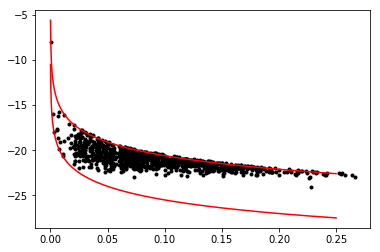

In [124]:
plt.plot(Zg,Mg,linestyle='none',marker='.',color='black')
plt.plot(Zmlim,Mlim,color='red')
plt.plot(Zmmax,Mmax,color='red')
plt.show